# Dataframe, import export csv

In [ ]:
import pandas as pd

# Series -> 1 dimensional
series = pd.Series(["one", "two", "three"])
series2 = pd.Series([1, 2, 3])
print(series)

# Dataframe -> 2 dimensional
df = pd.DataFrame({"a": series, "b": series2})
print(df)

0      one
1      two
2    three
dtype: object
       a  b
0    one  1
1    two  2
2  three  3


In [ ]:
#import export csv

car_sales = pd.read_csv("car-sales.csv")
car_sales.to_csv("exported_csv.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


# Info about a dataframe

In [ ]:
car_sales.dtypes

,0
Make,object
Colour,object
Odometer (KM),int64
Doors,int64
Price,object


In [ ]:
car_columns = car_sales.columns
car_columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [ ]:
car_sales.index

RangeIndex(start=0, stop=10, step=1)

In [ ]:
car_sales.describe()

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


In [ ]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 532.0+ bytes


In [ ]:
car_sales["Doors"].sum()

np.int64(40)

In [ ]:
len(car_sales)

10

# Select and view data


In [ ]:
car_sales.head(4)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"


In [ ]:
car_sales.tail(4)

,Make,Colour,Odometer (KM),Doors,Price
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [ ]:
animals = pd.Series(["dog","cat","panda"], index=[0,3,3])

print(animals.loc[3])

3      cat
3    panda
dtype: object


In [ ]:
car_sales.iloc[4:6]

,Make,Colour,Odometer (KM),Doors,Price
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"


In [ ]:
car_sales[car_sales["Make"] == "Toyota"]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
5,Toyota,Green,99213,4,"$4,500.00"
8,Toyota,White,60000,4,"$6,250.00"


In [ ]:
pd.crosstab(car_sales["Make"], car_sales["Doors"])

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


In [ ]:
car_sales.groupby(["Make"]).mean(numeric_only=True)

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


<Axes: >

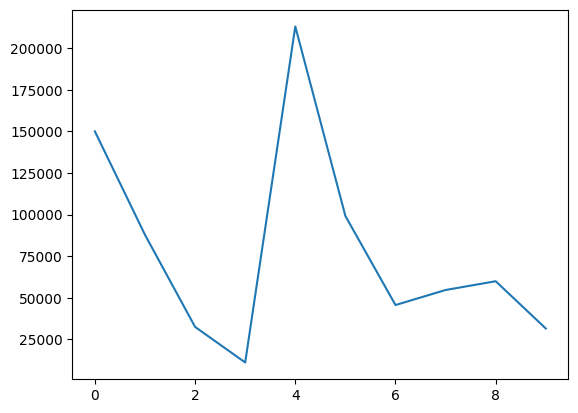

In [ ]:
car_sales["Odometer (KM)"].plot()

<Axes: >

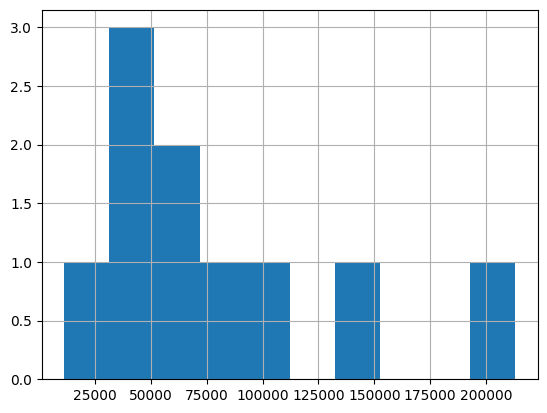

In [ ]:
car_sales["Odometer (KM)"].hist()

<Axes: >

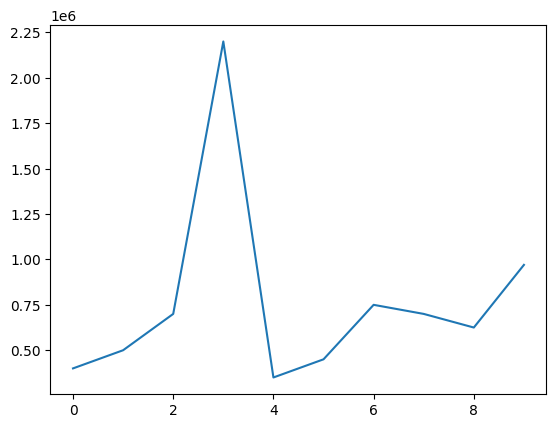

In [ ]:
car_sales["Price"] = car_sales["Price"].str.replace('[$,.]','',regex=True).astype(int)
car_sales["Price"].plot()

#Manipulating data

In [ ]:
car_sales["Make"] = car_sales["Make"].str.lower()

In [ ]:
missing_car_sales = pd.read_csv("car-sales-missing-data.csv")
missing_car_sales

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [ ]:
missing_car_sales["Odometer"] = missing_car_sales["Odometer"].fillna(missing_car_sales["Odometer"].mean())
missing_car_sales

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,NaN,92302.666667,4.0,"$7,500"
7,Honda,Blue,92302.666667,4.0,NaN
8,Toyota,White,60000.000000,NaN,NaN
9,NaN,White,31600.000000,4.0,"$9,700"


In [ ]:
dropped_missing_car_sales = missing_car_sales.dropna()
dropped_missing_car_sales

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"


In [ ]:
seats = pd.Series([5,5,5,5,5,5])
dropped_missing_car_sales["Seat"] = seats
dropped_missing_car_sales

<ipython-input-70-1711a98a15e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_missing_car_sales["Seat"] = seats


,Make,Colour,Odometer,Doors,Price,Seat
0,Toyota,White,150043.000000,4.0,"$4,000",5
1,Honda,Red,87899.000000,4.0,"$5,000",5
2,Toyota,Blue,92302.666667,3.0,"$7,000",5
3,BMW,Black,11179.000000,5.0,"$22,000",5
4,Nissan,White,213095.000000,4.0,"$3,500",5
5,Toyota,Green,92302.666667,4.0,"$4,500",5


In [ ]:
fuel_economy = [7.5, 9.2, 5.0, 9.6, 8.7, 5.9]
dropped_missing_car_sales["Fuel_economy"] = fuel_economy
dropped_missing_car_sales

<ipython-input-71-279d1c5603e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_missing_car_sales["Fuel_economy"] = fuel_economy


,Make,Colour,Odometer,Doors,Price,Seat,Fuel_economy
0,Toyota,White,150043.000000,4.0,"$4,000",5,7.5
1,Honda,Red,87899.000000,4.0,"$5,000",5,9.2
2,Toyota,Blue,92302.666667,3.0,"$7,000",5,5.0
3,BMW,Black,11179.000000,5.0,"$22,000",5,9.6
4,Nissan,White,213095.000000,4.0,"$3,500",5,8.7
5,Toyota,Green,92302.666667,4.0,"$4,500",5,5.9


In [ ]:
dropped_missing_car_sales["Fuel_used"] = dropped_missing_car_sales["Odometer"]/100 * dropped_missing_car_sales["Fuel_economy"]
dropped_missing_car_sales

<ipython-input-72-decb7fd6f77e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_missing_car_sales["Fuel_used"] = dropped_missing_car_sales["Odometer"]/100 * dropped_missing_car_sales["Fuel_economy"]


,Make,Colour,Odometer,Doors,Price,Seat,Fuel_economy,Fuel_used
0,Toyota,White,150043.000000,4.0,"$4,000",5,7.5,11253.225000
1,Honda,Red,87899.000000,4.0,"$5,000",5,9.2,8086.708000
2,Toyota,Blue,92302.666667,3.0,"$7,000",5,5.0,4615.133333
3,BMW,Black,11179.000000,5.0,"$22,000",5,9.6,1073.184000
4,Nissan,White,213095.000000,4.0,"$3,500",5,8.7,18539.265000
5,Toyota,Green,92302.666667,4.0,"$4,500",5,5.9,5445.857333


In [ ]:
dropped_missing_car_sales["Wheels"] = 4
dropped_missing_car_sales

<ipython-input-73-db37d9da06c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_missing_car_sales["Wheels"] = 4


,Make,Colour,Odometer,Doors,Price,Seat,Fuel_economy,Fuel_used,Wheels
0,Toyota,White,150043.000000,4.0,"$4,000",5,7.5,11253.225000,4
1,Honda,Red,87899.000000,4.0,"$5,000",5,9.2,8086.708000,4
2,Toyota,Blue,92302.666667,3.0,"$7,000",5,5.0,4615.133333,4
3,BMW,Black,11179.000000,5.0,"$22,000",5,9.6,1073.184000,4
4,Nissan,White,213095.000000,4.0,"$3,500",5,8.7,18539.265000,4
5,Toyota,Green,92302.666667,4.0,"$4,500",5,5.9,5445.857333,4


In [ ]:
dropped_missing_car_sales = dropped_missing_car_sales.drop("Wheels" , axis=1)
dropped_missing_car_sales

,Make,Colour,Odometer,Doors,Price,Seat,Fuel_economy,Fuel_used
0,Toyota,White,150043.000000,4.0,"$4,000",5,7.5,11253.225000
1,Honda,Red,87899.000000,4.0,"$5,000",5,9.2,8086.708000
2,Toyota,Blue,92302.666667,3.0,"$7,000",5,5.0,4615.133333
3,BMW,Black,11179.000000,5.0,"$22,000",5,9.6,1073.184000
4,Nissan,White,213095.000000,4.0,"$3,500",5,8.7,18539.265000
5,Toyota,Green,92302.666667,4.0,"$4,500",5,5.9,5445.857333


In [ ]:
dropped_missing_car_sales = dropped_missing_car_sales.sample(frac=1).reset_index(drop=True)
dropped_missing_car_sales

,Make,Colour,Odometer,Doors,Price,Seat,Fuel_economy,Fuel_used
0,Toyota,Blue,92302.666667,3.0,"$7,000",5,5.0,4615.133333
1,BMW,Black,11179.000000,5.0,"$22,000",5,9.6,1073.184000
2,Nissan,White,213095.000000,4.0,"$3,500",5,8.7,18539.265000
3,Toyota,White,150043.000000,4.0,"$4,000",5,7.5,11253.225000
4,Toyota,Green,92302.666667,4.0,"$4,500",5,5.9,5445.857333
5,Honda,Red,87899.000000,4.0,"$5,000",5,9.2,8086.708000


In [ ]:
dropped_missing_car_sales["Odometer"] = dropped_missing_car_sales["Odometer"].apply(lambda x: x/1.6)
dropped_missing_car_sales

,Make,Colour,Odometer,Doors,Price,Seat,Fuel_economy,Fuel_used
0,Toyota,Blue,57689.166667,3.0,"$7,000",5,5.0,4615.133333
1,BMW,Black,6986.875000,5.0,"$22,000",5,9.6,1073.184000
2,Nissan,White,133184.375000,4.0,"$3,500",5,8.7,18539.265000
3,Toyota,White,93776.875000,4.0,"$4,000",5,7.5,11253.225000
4,Toyota,Green,57689.166667,4.0,"$4,500",5,5.9,5445.857333
5,Honda,Red,54936.875000,4.0,"$5,000",5,9.2,8086.708000
